#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [ ]:
traffic_data = pd.read_csv('/content/Task (1) Dataset.csv')

traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### Handle Missing Values

In [ ]:
#Calculate total and percent of null values in the dataset
total = traffic_data.isnull().sum().sort_values(ascending=False)
percent = round((traffic_data.isnull().sum()/traffic_data.isnull().count()*100),1)

missing_values = pd.concat([total,percent],axis=1, keys=['Total','%'])

missing_values

,Total,%
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


In [ ]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
#Check for values that can help with replacing null values and the nature of the columns
traffic_data.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9730,8:59:00,Monday,Under 18,Male,Elementary school,Employee,2-5yr,Lorry (41?100Q),Organization,2-5yrs,...,Going straight,Passenger,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


In [ ]:
#drop null values
traffic_data.dropna(inplace=True)

In [ ]:
#Check values are dropped
traffic_data.shape

(2889, 32)

### Correct any inconsistent data entries.

In [ ]:
traffic_data.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
5685,18:28:00,Tuesday,18-30,Male,Elementary school,Employee,Below 1yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,Driving at high speed,Slight Injury


##### Check for the inconsistent data entries using unique()

In [ ]:
traffic_data['Driving_experience'].unique()

array(['Above 10yr', '1-2yr', '5-10yr', 'Below 1yr', '2-5yr',
       'No Licence', 'unknown'], dtype=object)

In [ ]:
traffic_data['Service_year_of_vehicle'].unique()

array(['1-2yr', '2-5yrs', 'Above 10yr', '5-10yrs', 'Unknown', 'Below 1yr'],
      dtype=object)

In [ ]:
traffic_data['Casualty_severity'].unique()

array(['3', 'na', '2', '1'], dtype=object)

In [ ]:
traffic_data['Casualty_severity'].value_counts()

Casualty_severity
3     1682
na    1042
2      159
1        6
Name: count, dtype: int64

In [ ]:
index = traffic_data[traffic_data['Casualty_severity'] =='na'].index
traffic_data.drop(index, axis=0, inplace =True)

In [ ]:
traffic_data['Casualty_severity'] = traffic_data['Casualty_severity'].astype('int64')

In [ ]:
traffic_data['Casualty_class'].unique()

array(['Pedestrian', 'Passenger', 'Driver or rider'], dtype=object)

In [ ]:
traffic_data['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18'], dtype=object)

### Ensure data types are appropriate for each column.

---



In [ ]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         1847 non-null   object
 1   Day_of_week                  1847 non-null   object
 2   Age_band_of_driver           1847 non-null   object
 3   Sex_of_driver                1847 non-null   object
 4   Educational_level            1847 non-null   object
 5   Vehicle_driver_relation      1847 non-null   object
 6   Driving_experience           1847 non-null   object
 7   Type_of_vehicle              1847 non-null   object
 8   Owner_of_vehicle             1847 non-null   object
 9   Service_year_of_vehicle      1847 non-null   object
 10  Defect_of_vehicle            1847 non-null   object
 11  Area_accident_occured        1847 non-null   object
 12  Lanes_or_Medians             1847 non-null   object
 13  Road_allignment              1847 non

In [ ]:
#traffic_data['Type_of_vehicle'].unique()

#traffic_data['Type_of_vehicle'].str.

In [ ]:
labelEncod = LabelEncoder()
traffic_data['Day_of_week_Encoded'] = labelEncod.fit_transform(traffic_data[['Day_of_week']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
traffic_data['Time'] = traffic_data['Time'].astype('datetime64[ns]')

<ipython-input-22-5829267794ff>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_data['Time'] = traffic_data['Time'].astype('datetime64[ns]')


In [ ]:
traffic_data['Hour'] = (traffic_data['Time'].dt.hour).astype('int64')

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
traffic_data.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Time,1847,NaN,NaN,NaN,2024-07-25 14:16:42.003248896,2024-07-25 00:04:00,2024-07-25 10:16:30,2024-07-25 15:10:00,2024-07-25 18:15:00,2024-07-25 23:56:00,NaN
Day_of_week,1847,7,Friday,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_band_of_driver,1847,5,18-30,653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex_of_driver,1847,3,Male,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational_level,1847,7,Junior high school,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_driver_relation,1847,4,Employee,1544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_experience,1847,7,5-10yr,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_vehicle,1847,17,Automobile,514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_of_vehicle,1847,4,Owner,1645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_year_of_vehicle,1847,6,Unknown,665,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify and analyze patterns in the data.

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Number_of_vehicles_involved'}>],
       [<Axes: title={'center': 'Number_of_casualties'}>,
        <Axes: title={'center': 'Casualty_severity'}>],
       [<Axes: title={'center': 'Day_of_week_Encoded'}>,
        <Axes: title={'center': 'Hour'}>]], dtype=object)

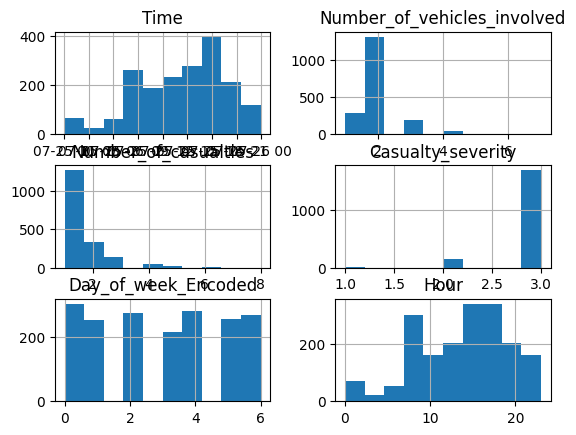

In [ ]:
traffic_data.hist()

<Axes: xlabel='Day_of_week', ylabel='Number_of_casualties'>

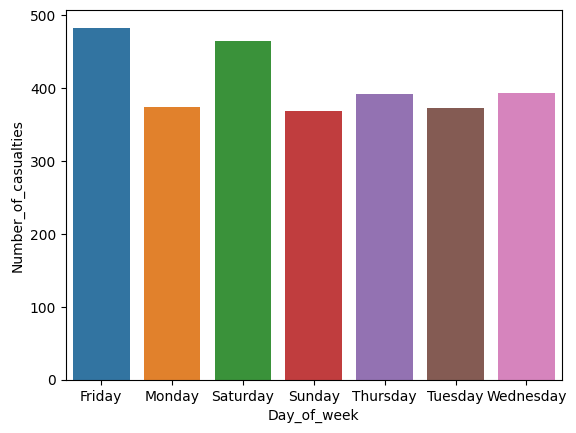

In [ ]:
Trrafic_data_grouped = traffic_data[['Day_of_week','Number_of_vehicles_involved','Number_of_casualties']].groupby('Day_of_week').sum()

sns.barplot(data=Trrafic_data_grouped, y='Number_of_casualties', x='Day_of_week',hue='Day_of_week', palette="tab10", linewidth=2.5)

<Axes: xlabel='Day_of_week', ylabel='Number_of_vehicles_involved'>

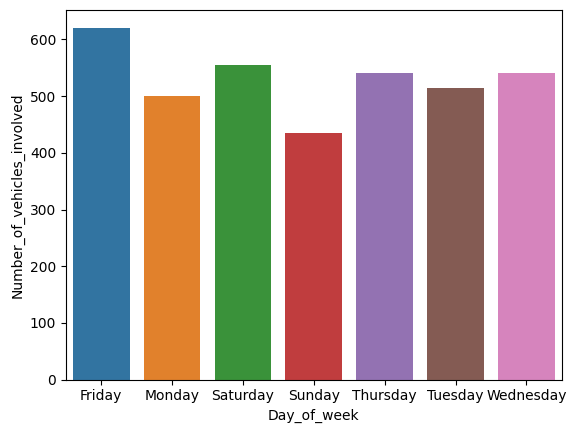

In [ ]:
sns.barplot(data=Trrafic_data_grouped, y='Number_of_vehicles_involved', x='Day_of_week',hue='Day_of_week', palette="tab10", linewidth=2.5)

Text(0, 0.5, 'Time')

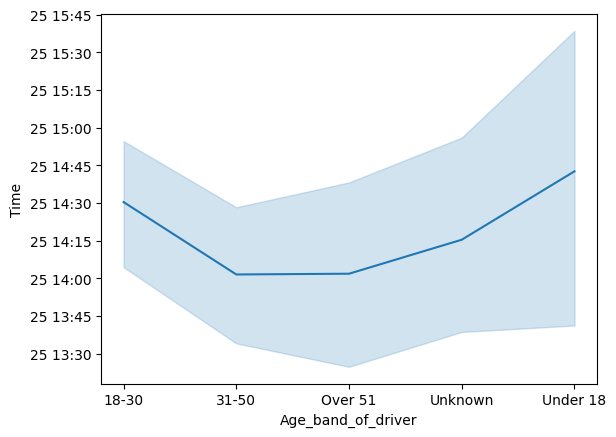

In [ ]:
sns.lineplot(data=traffic_data, y='Time', x='Age_band_of_driver')
plt.ylabel('Time')

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

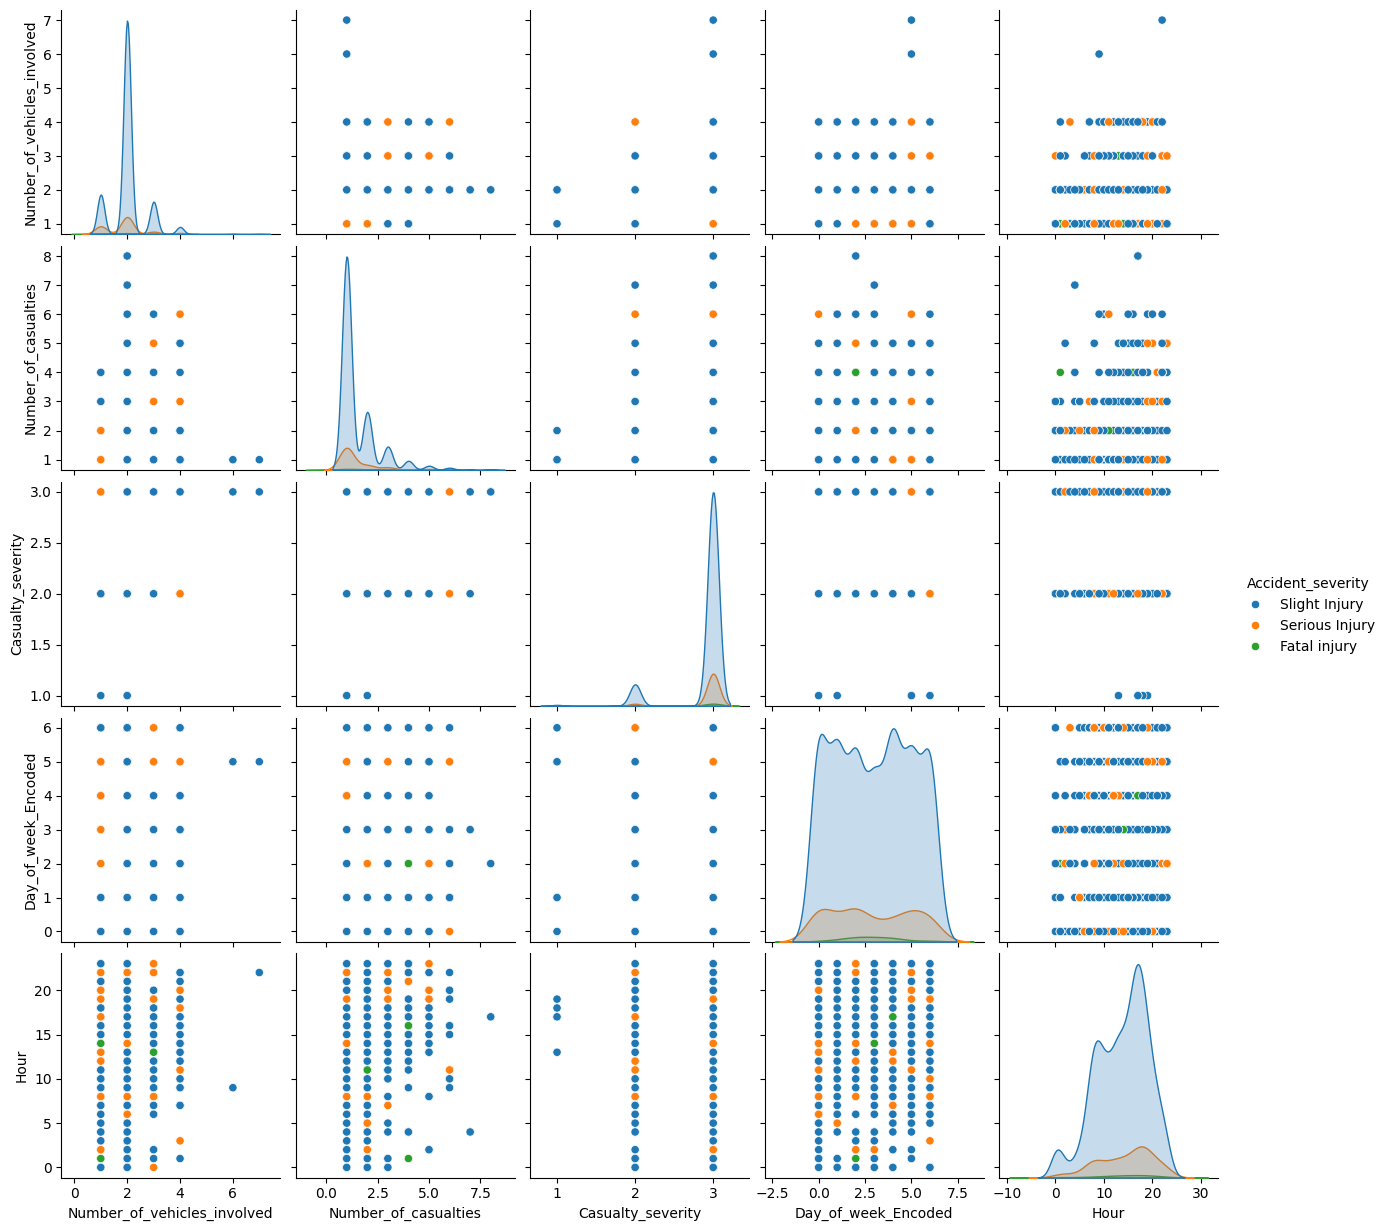

In [ ]:
sns.pairplot(traffic_data, hue='Accident_severity')

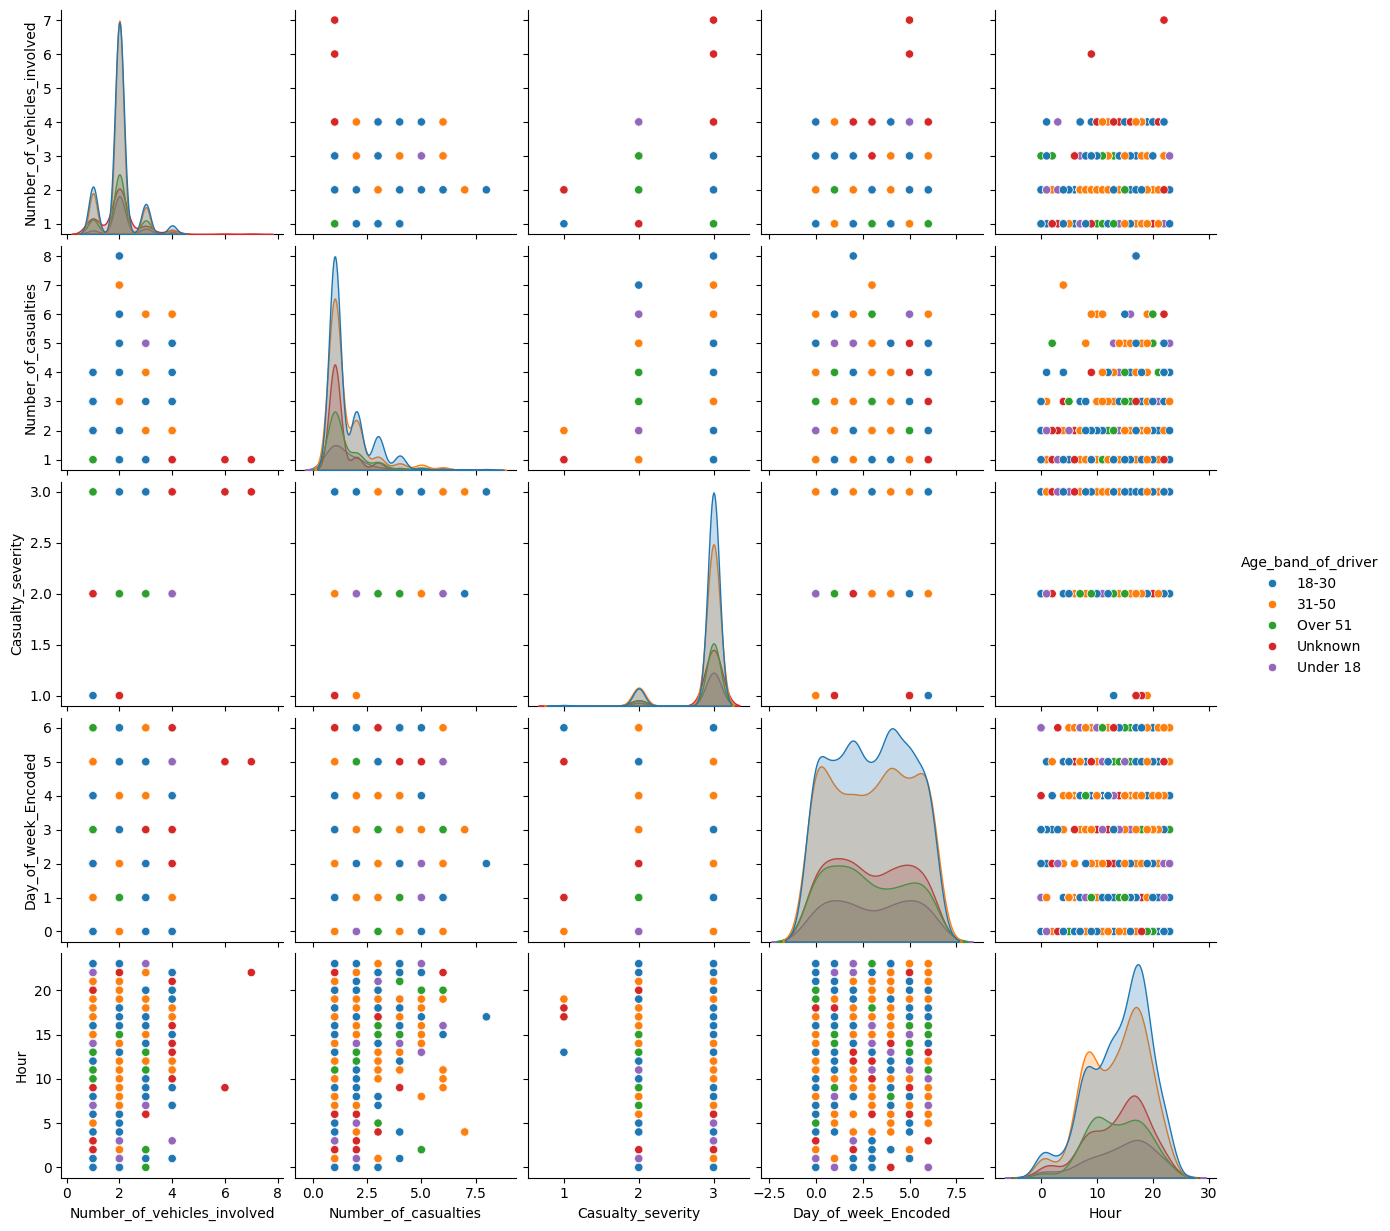

In [ ]:
sns.pairplot(traffic_data, hue='Age_band_of_driver')

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


<Axes: >

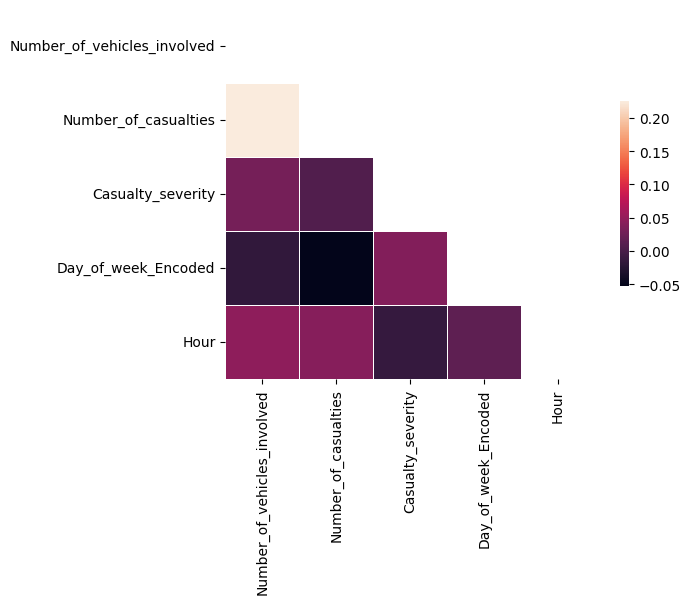

In [ ]:
corr = traffic_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day_of_week_Encoded,Hour
5776,2024-07-25 15:45:00,Tuesday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Overtaking,Slight Injury,5,15


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: xlabel='Day_of_week_Encoded', ylabel='Count'>

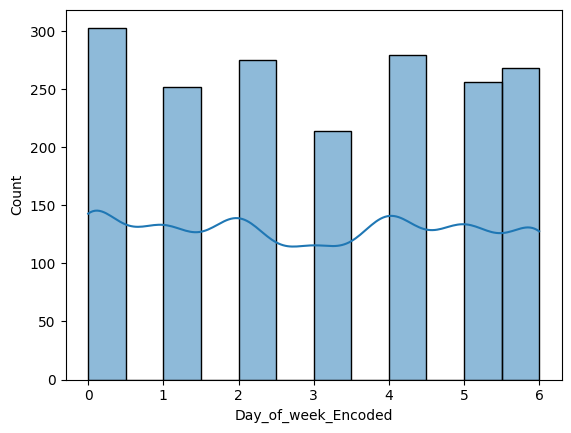

In [ ]:
#0: Friday, 2: Saturday,  3:sunday, 1:monday, 5:Tuesday, 6:Wednesday, 4:Thursday

sns.histplot(data=traffic_data, x='Day_of_week_Encoded', kde=True )

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Number_of_casualties'>

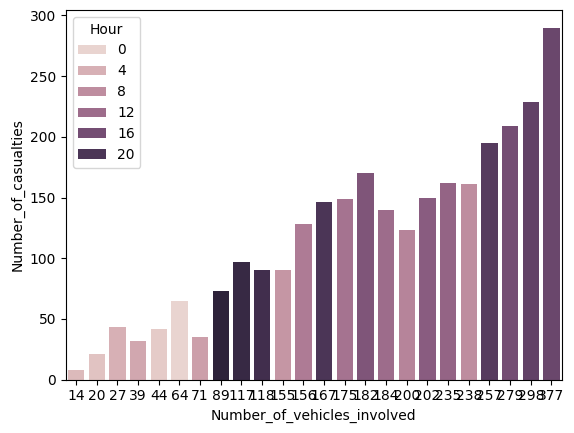

In [ ]:
Highest_incidentd_by_hours = traffic_data[['Hour','Number_of_vehicles_involved','Number_of_casualties']].groupby('Hour').sum()
sns.barplot(data=Highest_incidentd_by_hours, y="Number_of_casualties", x="Number_of_vehicles_involved", hue='Hour')


## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>